In [1]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: C:\Users\adria\tf_venv\Scripts\python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Se redimensionarán las imágenes para trabajarlas a 150x150 pixeles
IMG_WIDTH, IMG_HEIGHT = 150, 150

# Se definen las rutas de las carpetas de entrenamiento y validación


train_dir = "V:/ProyectoMOCA/ProyectoDL_depth/train"
validation_dir = "V:/ProyectoMOCA/ProyectoDL_depth/validation"
# Crear un generador de imágenes para el preprocesamiento de los datos
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizar imágenes
    shear_range=0.2,            # Transformación aleatoria
    zoom_range=0.2,             # Zoom aleatorio
    horizontal_flip=True)       # Volteo horizontal de las imágenes

# Imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')    # Modo categórico para múltiples clases

# Imágenes para la validación (solo rescalado)
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')

Found 34900 images belonging to 10 classes.
Found 4970 images belonging to 10 classes.


In [ ]:
Para hacer uso de la GPU usar "Python (tf_venv)

In [4]:
from tensorflow.keras import layers, models

# Definimos la arquitectura de la CNN
model = models.Sequential()

# Primera capa convolucional + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Cuarta capa convolucional + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar las capas
model.add(layers.Flatten())

# Añadir una capa densa completamente conectada
model.add(layers.Dense(512, activation='relu'))

# Capa de salida con softmax para clasificación 
model.add(layers.Dense(10, activation='softmax'))   # 10 clases (c0 - c9)

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/50
1090/1090 [==============================] - 290s 262ms/step - loss: 0.7403 - accuracy: 0.7449 - val_loss: 0.2121 - val_accuracy: 0.9333
Epoch 2/50
1090/1090 [==============================] - 113s 104ms/step - loss: 0.1876 - accuracy: 0.9440 - val_loss: 0.1259 - val_accuracy: 0.9661
Epoch 3/50
1090/1090 [==============================] - 112s 102ms/step - loss: 0.1180 - accuracy: 0.9636 - val_loss: 0.1095 - val_accuracy: 0.9704
Epoch 4/50
1090/1090 [==============================] - 206s 189ms/step - loss: 0.0857 - accuracy: 0.9738 - val_loss: 0.0977 - val_accuracy: 0.9754
Epoch 5/50
1090/1090 [==============================] - 172s 158ms/step - loss: 0.0719 - accuracy: 0.9778 - val_loss: 0.0902 - val_accuracy: 0.9768
Epoch 6/50
1090/1090 [==============================] - 103s 94ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0709 - val_accuracy: 0.9821
Epoch 7/50
1090/1090 [==============================] - 103s 95ms/step - loss: 0.0490 - accuracy: 0.9848 - val_lo

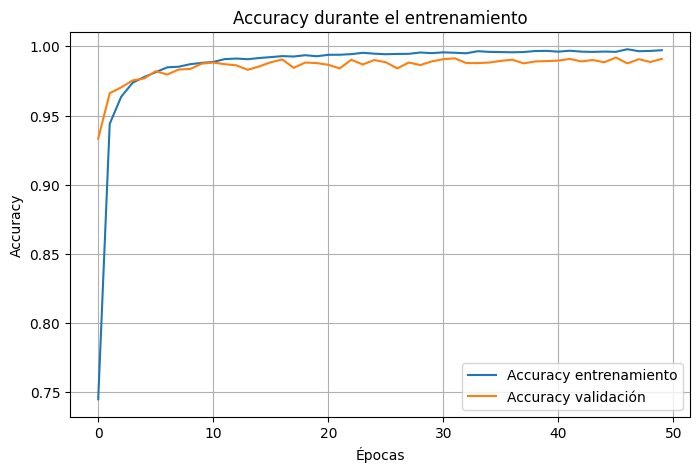

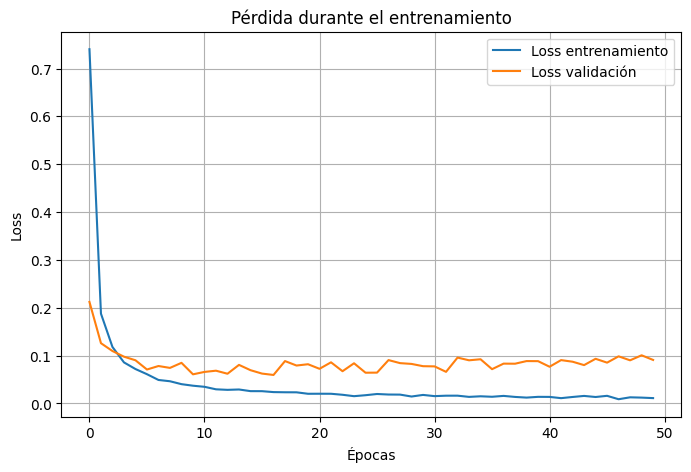

In [8]:
import matplotlib.pyplot as plt

# ============================
#  GRÁFICA DE ACCURACY
# ============================
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Accuracy entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ============================
#  GRÁFICA DE LOSS
# ============================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Loss entrenamiento')
plt.plot(history.history['val_loss'], label='Loss validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(validation_generator)
print(f"Accuracy en validación: {accuracy*100:.2f}%")

156/156 [==============================] - 6s 39ms/step - loss: 0.0907 - accuracy: 0.9909
Accuracy en validación: 99.09%


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os
import random

# 1. Preparar el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)  # Solo rescalado, sin aumentación

test_generator = test_datagen.flow_from_directory(
    "V:/ProyectoMOCA/ProyectoDL_depth/test",         # Ruta al conjunto de prueba
    target_size=(150, 150),                        # Tamaño de las imágenes que espera el modelo
    batch_size=32,                                 # Tamaño de lote
    class_mode='categorical',                      # Cambiar a 'categorical' para múltiples clases
    shuffle=False                                  # No barajar para mantener el orden
)

# 2. Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f"Pérdida en prueba: {loss:.4f}")
print(f"Precisión en prueba: {accuracy*100:.2f}%")

# 3. Seleccionar una imagen aleatoria
# Directorio de prueba
test_dir = "V:/ProyectoMOCA/ProyectoDL_depth/test"

# Seleccionar una clase al azar
class_folders = os.listdir(test_dir)
random_class = random.choice(class_folders)  # Elegir una clase aleatoria

# Seleccionar una imagen al azar de la clase elegida
class_path = os.path.join(test_dir, random_class)
image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
random_image = random.choice(image_files)

# Ruta completa de la imagen
img_path = os.path.join(class_path, random_image)
print(f"Imagen seleccionada: {img_path}")

# Cargar la imagen y procesarla
img = load_img(img_path, target_size=(150, 150))  # Redimensionar
img_array = img_to_array(img) / 255.0             # Convertir a tensor y normalizar
img_array = np.expand_dims(img_array, axis=0)     # Agregar dimensión de lote

# Predecir la clase de la imagen
prediction = model.predict(img_array)

# Interpretar la predicción
class_indices = test_generator.class_indices       # Diccionario de clases
class_labels = list(class_indices.keys())          # Etiquetas de clases

predicted_class = np.argmax(prediction[0])         # Clase con mayor probabilidad
predicted_label = class_labels[predicted_class]    # Etiqueta de la clase predicha

print(f"Predicción: Clase {predicted_class} ({predicted_label})")

Found 5056 images belonging to 10 classes.
158/158 [==============================] - 34s 216ms/step - loss: 0.0888 - accuracy: 0.9889
Pérdida en prueba: 0.0888
Precisión en prueba: 98.89%
Imagen seleccionada: V:/ProyectoMOCA/ProyectoDL_depth/test\c3\img_19215.jpg
1/1 [==============================] - 0s 258ms/step
Predicción: Clase 3 (c3)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np, os, random, math
import matplotlib.pyplot as plt

test_dir = r"V:/ProyectoMOCA/ProyectoDL/test"
img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes SIN etiquetas desde la raíz
test_gen_no_labels = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode=None,        # <— sin etiquetas
    shuffle=False,
    classes=['.']           # <— leer desde la raíz del folder
)

print("Imágenes encontradas:", test_gen_no_labels.samples)  # Verifica que > 0

# Predicciones de TODO el set (sin métricas, solo y_pred_proba)
y_pred_proba = model.predict(test_gen_no_labels, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)

# Si quieres ver N imágenes aleatorias con su predicción:
N = 5
all_files = [f for f in os.listdir(test_dir)
             if os.path.isfile(os.path.join(test_dir, f))
             and os.path.splitext(f)[1].lower() in {'.jpg','.jpeg','.png','.bmp','.gif'}]

for _ in range(min(N, len(all_files))):
    fname = random.choice(all_files)
    path = os.path.join(test_dir, fname)
    img = load_img(path, target_size=img_size)
    arr = img_to_array(img)/255.0
    arr = np.expand_dims(arr, axis=0)
    probs = model.predict(arr, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_prob = float(probs[pred_idx])

    # Si tienes el mapeo de clases del entrenamiento:
    # class_indices = train_generator.class_indices
    # idx_to_class = {v:k for k,v in class_indices.items()}
    # pred_label = idx_to_class[pred_idx]
    pred_label = f"clase_{pred_idx}"

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {pred_label} ({pred_prob:.1%})\n{fname}")
    plt.show()


Found 2528 images belonging to 1 classes.
Imágenes encontradas: 2528
79/79 [==============================] - 17s 210ms/step


In [13]:
print(train_generator.class_indices)


{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 144, 144, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 663552)            0         
                                                                 
 dense (Dense)               (None, 512)               339739136 
                                                        

In [20]:
train_datagen = ...
train_generator = ...

